In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

**Upload and Read data**

In [ ]:
uploaded=files.upload()

Saving Case-Data 3.csv to Case-Data 3.csv


In [ ]:
df=pd.read_csv("Case-Data 3.csv")
df

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,19-02-2018 07:00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476
1,Boston,19-02-2018 09:40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275
2,Boston,19-02-2018 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,962
3,Boston,19-02-2018 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021
4,Boston,19-02-2018 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,979
...,...,...,...,...,...,...,...,...,...,...,...
121,Boston,04-03-2018 17:40,5 mins,True,False,1718,2655,173,28288.52115,2600,1361
122,Boston,04-03-2018 20:20,2 mins,False,False,1303,2334,158,27072.60635,2164,940
123,Boston,04-03-2018 23:00,5 mins,True,False,1157,2359,154,23525.11595,2323,1473
124,Boston,05-03-2018 01:40,2 mins,False,False,1170,2240,131,23005.27027,2257,900


Filter data

In [ ]:
df.keys()

Index(['city_id', 'period_start', 'wait_time', 'treat', 'commute',
       'trips_pool', 'trips_express', 'rider_cancellations',
       'total_driver_payout', 'total_matches', 'total_double_matches'],
      dtype='object')

In [ ]:
lis=['treat','trips_pool', 'trips_express', 'rider_cancellations','total_driver_payout', 'total_matches', 'total_double_matches']
df=df[lis]

In [ ]:
df

,treat,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,False,1415,3245,256,34458.41163,3372,1476
1,True,1461,2363,203,29764.34982,2288,1275
2,False,1362,2184,118,27437.36736,2283,962
3,True,1984,3584,355,44995.45299,4035,2021
4,False,1371,2580,181,27583.95530,2200,979
...,...,...,...,...,...,...,...
121,True,1718,2655,173,28288.52115,2600,1361
122,False,1303,2334,158,27072.60635,2164,940
123,True,1157,2359,154,23525.11595,2323,1473
124,False,1170,2240,131,23005.27027,2257,900


In [ ]:
control=df.loc[df['treat']==False]
treat=df.loc[df['treat']==True]

**Plotting the line chart**

(2000.0, 4750.0)

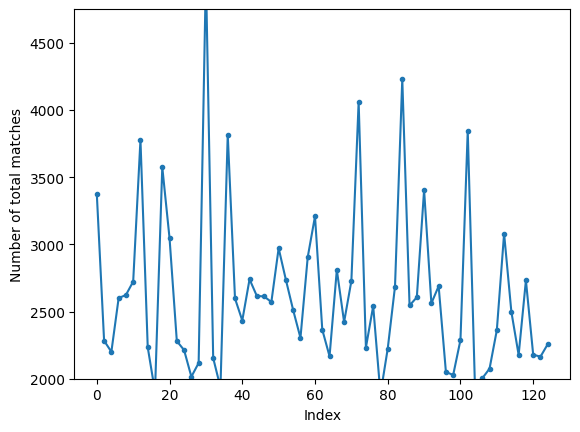

In [ ]:
plt.plot(control["total_matches"],'.-')
plt.xlabel("Index")
plt.ylabel("Number of total matches")
plt.ylim(2000,4750)

**Plotting the Histograms**

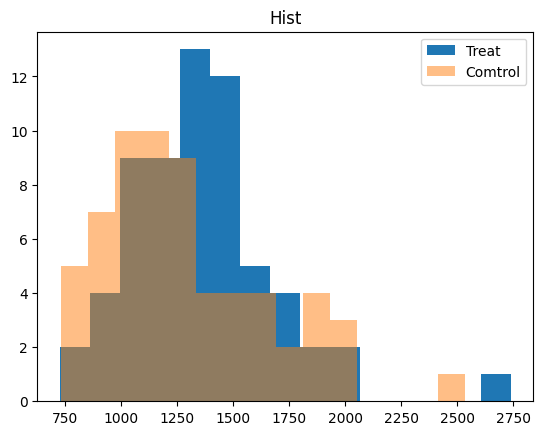

In [ ]:
plt.hist(treat['total_double_matches'],bins=15,label="Treat",alpha=1)
plt.hist(control['total_double_matches'],bins=15,label="Comtrol",alpha=0.5)
plt.title("Hist")
plt.legend()
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


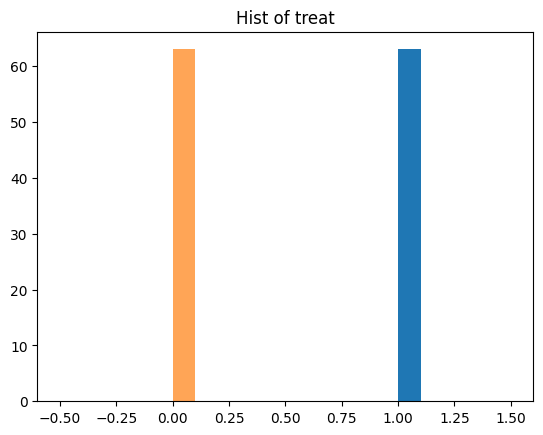

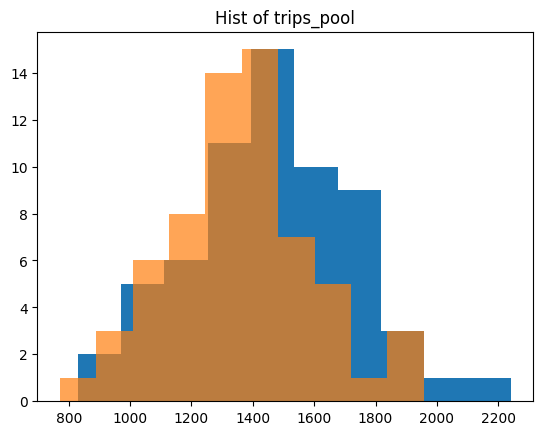

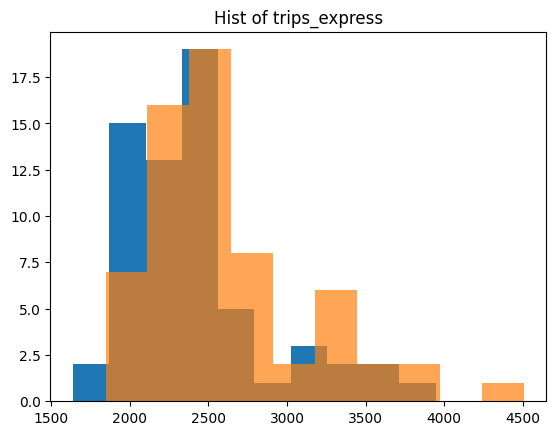

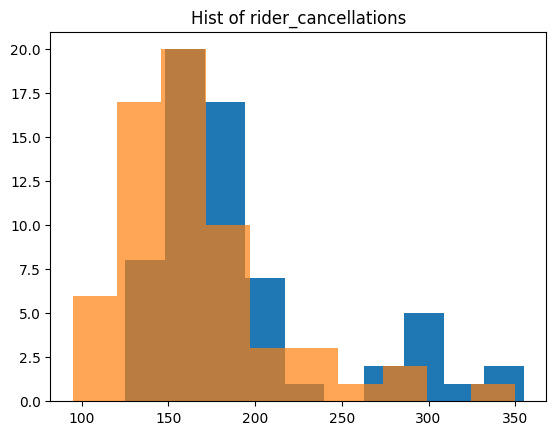

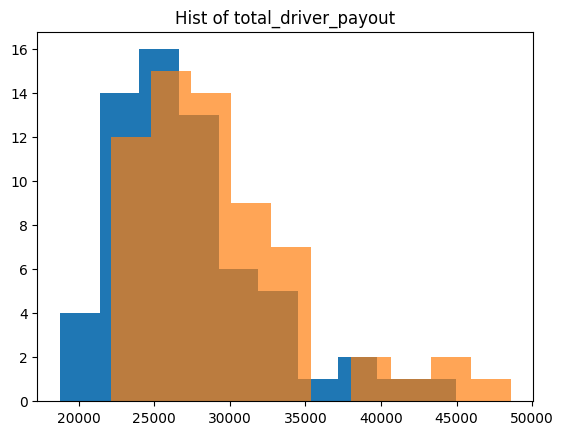

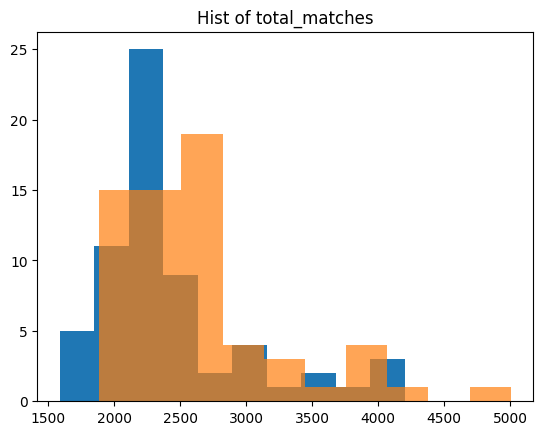

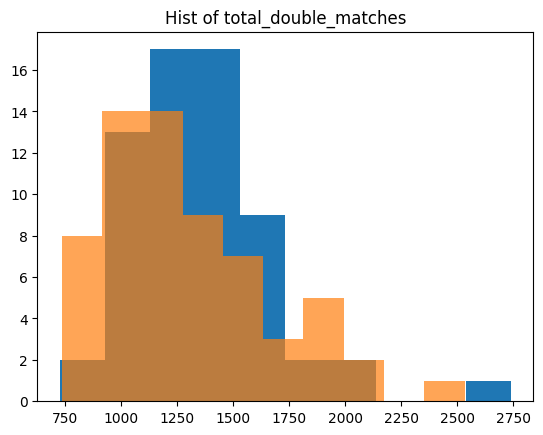

In [ ]:
for i in treat.keys():
  plt.hist(treat[i],bins=10)
  plt.hist(control[i],bins=10,alpha=0.7)
  plt.title("Hist of {}".format(i))
  plt.show()

**Seaborn, a tool for data science visualizations **

In [ ]:
import seaborn as sns

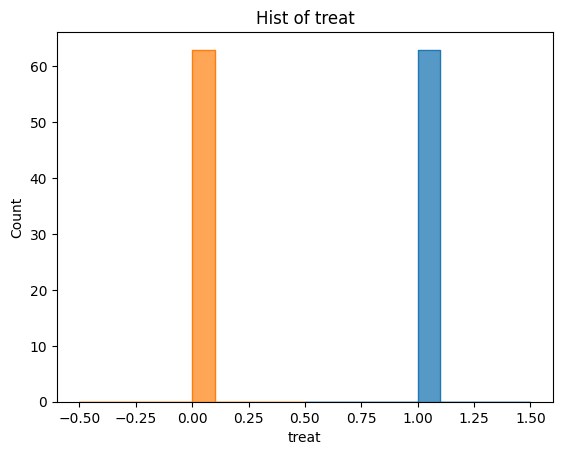

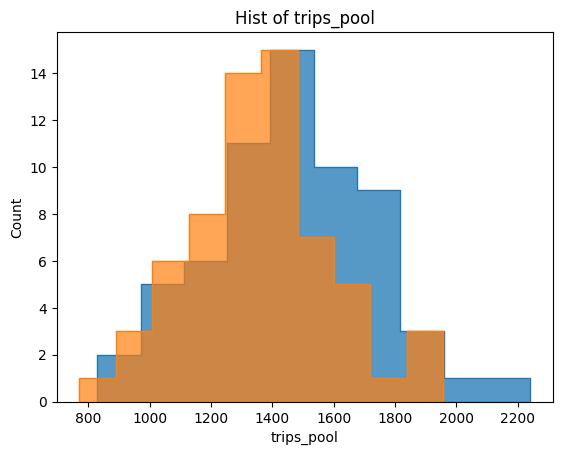

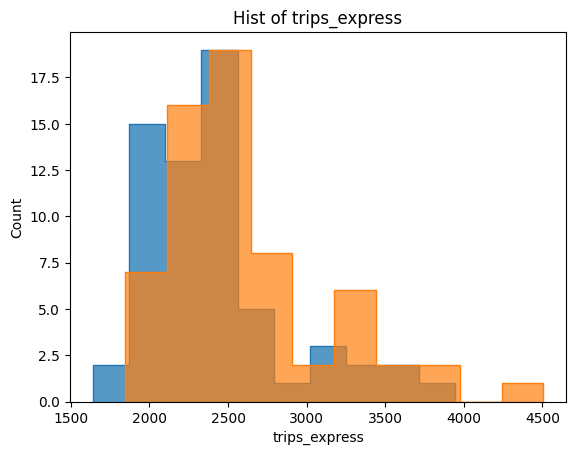

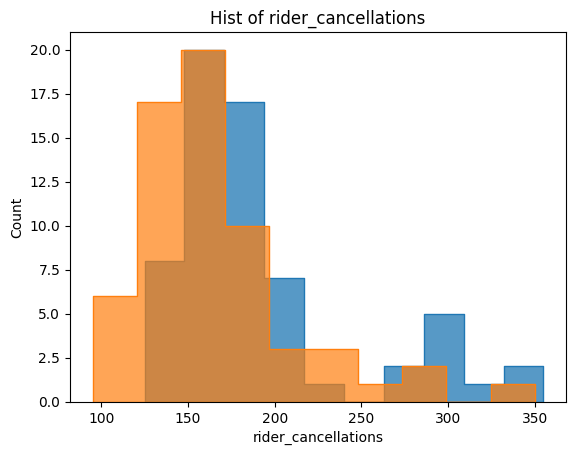

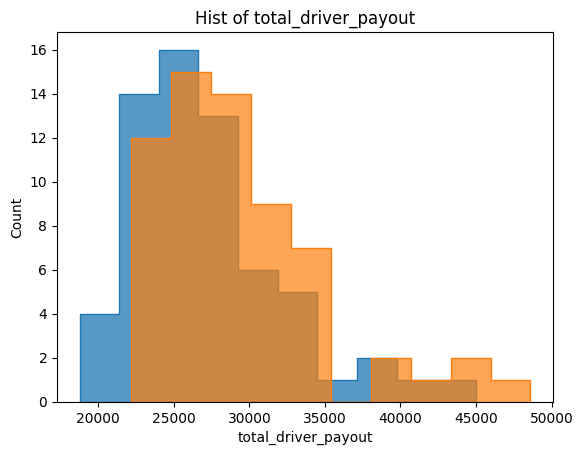

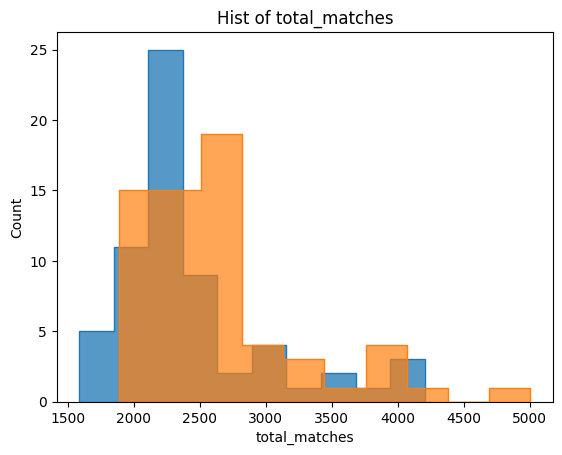

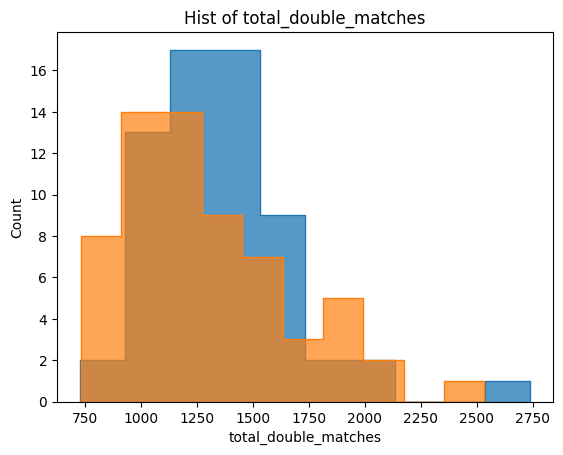

In [ ]:
for i in treat.keys():
  sns.histplot(treat[i],bins=10,element="step")
  sns.histplot(control[i],bins=10,alpha=0.7,element="step")
  plt.title("Hist of {}".format(i))
  plt.show()

Kernel Density Estimation using sklearn

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
kde=KernelDensity(bandwidth=150,kernel="gaussian")
kde.fit(np.array(treat['total_matches']).reshape(-1,1))
x_d=np.linspace(1100,5000,250)
log=kde.score_samples(x_d[:,None])
plt.fill_between(x_d,np.exp(log))

NameError: name 'KernelDensity' is not defined

Determining the bandwidth

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

df=pd.read_csv("Case-Data 3.csv")

# Assuming you have a DataFrame named 'df' with columns: rider_cancellations, total_matches, period_start

# Step 1: Calculate Cancellation Rate
df['cancellation_rate'] = df['rider_cancellations'] / df['total_matches']

# Step 2: Extract Commuting Hours
df['commuting_hours'] = df['period_start'].dt.hour.isin(range(6, 10))  # Adjust commuting hours as needed

# Separate Data for Commuting and Non-Commuting Hours
commuting_data = df[df['commuting_hours']]['cancellation_rate']
non_commuting_data = df[~df['commuting_hours']]['cancellation_rate']

# Step 3: KDE Plot
plt.figure(figsize=(10, 6))

# KDE Plot for Commuting Hours
sns.kdeplot(commuting_data, label='Commuting Hours', shade=True)

# KDE Plot for Non-Commuting Hours
sns.kdeplot(non_commuting_data, label='Non-Commuting Hours', shade=True)

# Plot Formatting
plt.title('Kernel Density Estimation of Cancellation Rate')
plt.xlabel('Cancellation Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Case-Data 3.csv'

Automatation

KDE and Histograms in one figure